# Working with Annual Averages in Cal-Adapt API

In [1]:
%matplotlib inline

import requests 
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
headers = {'ContentType': 'json'}

api = 'http://api.cal-adapt.org/api'

In [7]:
resource = 'counties'

# Point location in geojson format
coord = (-121.4687, 38.5938)
point = '{"type":"Point","coordinates":[%s,%s]}' % coord

# Params
params = {'intersects': point, 'srs': 4326, 'precision': 4}

# Construct url
url = '%s/%s/' % (api, resource)

# Get county geometry
response = requests.get(url, params, headers=headers)
print(response.url)
print()
if response.ok:
    data = response.json()
    geometry_uri = '/api/%s/%s/' % (resource, data['features'][0]['id'])
    print('Uniform Resource Identifier for county: %s' % geometry_uri)

https://api.cal-adapt.org/api/counties/?intersects=%7B%22type%22%3A%22Point%22%2C%22coordinates%22%3A%5B-121.4687%2C38.5938%5D%7D&srs=4326&precision=4

Uniform Resource Identifier for county: /api/counties/34/


### Get a list of annual timeseries from Cal-Adapt API for maximum temperature for HadGEM2-ES model

In [8]:
temp_url = 'http://api.cal-adapt.org/api/series/tasmax_year_HadGEM2-ES_rcp85/events/'
pr_url = 'http://api.cal-adapt.org/api/series/pr_year_HadGEM2-ES_rcp85/events/'

### Setup parameters for requesting data

In [12]:
params = {'ref': geometry_uri, 'stat': 'mean', 'imperial': True}

### Get temperature data and create a Pandas Series

In [13]:
response = requests.get(temp_url, params)
tmaxseries = pd.read_json(response.text, typ='series', orient='split')
tmaxseries.head()

2006-12-31 00:00:00+00:00    74.931107
2007-12-31 00:00:00+00:00    78.054192
2008-12-31 00:00:00+00:00    75.509369
2009-12-31 00:00:00+00:00    75.518158
2010-12-31 00:00:00+00:00    74.212547
Name: tasmax_year_HadGEM2-ES_rcp85, dtype: float64

### Get precipitation data and create a Pandas Series

In [17]:
response = requests.get(pr_url, params)
prseries = pd.read_json(response.text, typ='series', orient='split')
prseries.head()

2006-12-31 00:00:00+00:00    0.023838
2007-12-31 00:00:00+00:00    0.022522
2008-12-31 00:00:00+00:00    0.038045
2009-12-31 00:00:00+00:00    0.055141
2010-12-31 00:00:00+00:00    0.086447
Name: pr_year_HadGEM2-ES_rcp85, dtype: float64

/home/brian/.local/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


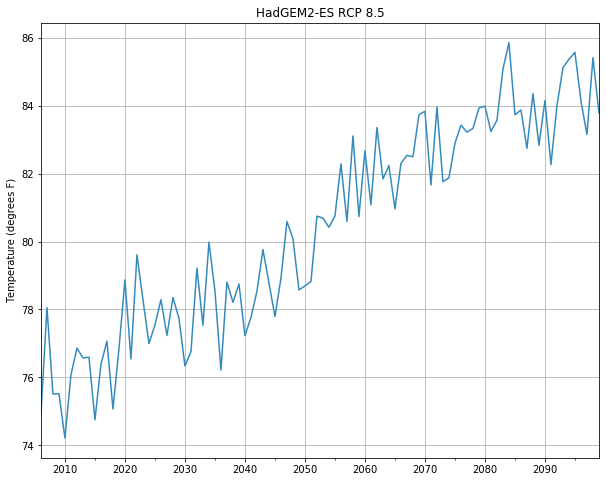

In [14]:
tmaxseries.plot(figsize=(10, 8), color='#348ABD')
plt.title('HadGEM2-ES RCP 8.5')
plt.ylabel('Temperature (degrees F)')
plt.grid(True)

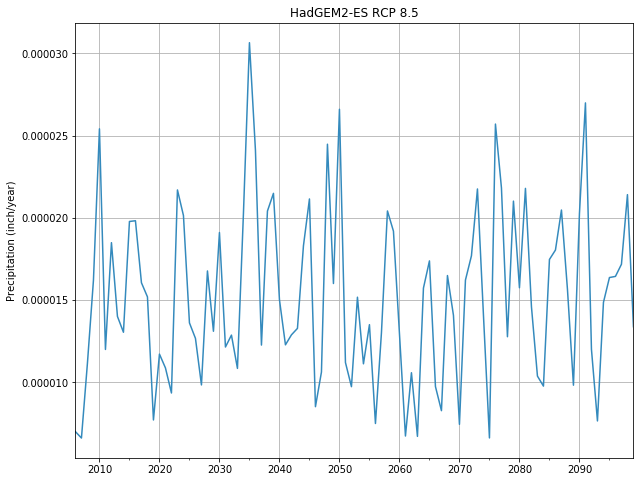

In [15]:
prseries.plot(figsize=(10, 8), color='#348ABD')
plt.title('HadGEM2-ES RCP 8.5')
plt.ylabel('Precipitation (inch/year)')
plt.grid(True)

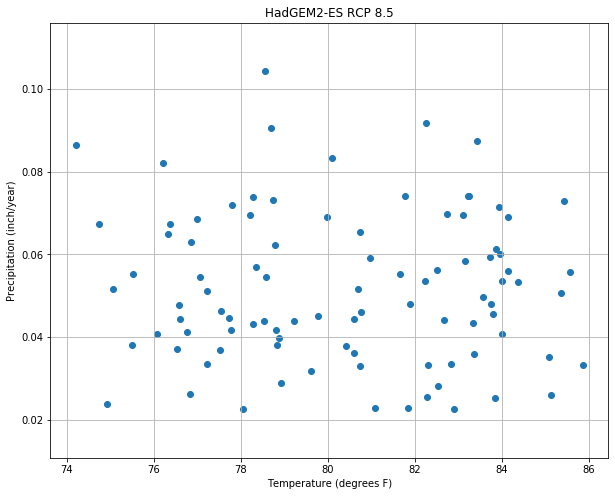

In [18]:
plt.figure(figsize=(10,8)) 
plt.scatter(tmaxseries, prseries)
plt.title('HadGEM2-ES RCP 8.5')
plt.ylabel('Precipitation (inch/year)')
plt.xlabel('Temperature (degrees F)')
plt.grid(True)